The purpose of this notebook is to compare the Delaware annual emissions data downloaded from CAMPD to the annual data constructed by aggregating the monthly CAMPD data and to the annual data downloaded from the RGGI dashboard. This should highlight any improper effects that may have arisen due to our processing of the data and help explain the structure of the Delaware data.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
df_annual = pd.read_csv(os.path.join("..", "..", "SharedData", "Emissions (1995-2024)", "annual-emissions-1995-2024-campd.csv"))
df_monthly = pd.read_csv(os.path.join("..", "..", "SharedData", "total_state_data.csv"))
df_rggi_de = pd.read_csv(os.path.join("..", "..", "SharedData", "Emissions (1995-2024)", "annual-emissions-2009-2023-rggi-delware.csv"))

In [40]:
df_annual.sample()

,State,Year,Gross Load (MWh),Steam Load (1000 lb),SO2 Mass (short tons),CO2 Mass (short tons),NOx Mass (short tons),Heat Input (mmBtu)
455,KS,2024,19631815.11,NaN,2719.698,18144297.2,9810.822,1.941720e+08


In [33]:
df_monthly.date = pd.to_datetime(df_monthly.date)
df_monthly["year"] = df_monthly.date.dt.year
df_monthly_annual = df_monthly.groupby(["state", "year"], as_index=False).sum(numeric_only=True)
df_monthly_annual

,state,year,population,total_co2,prcp,snow,tavg,gdp_rel_2017,energy_prod,energy_use,energy_flow
0,AL,1990,48600660.0,5.139607e+07,72.27,0.0,757.9,0.0,15233808.0,19193184.0,-3959376.0
1,AL,1991,49189872.0,5.538987e+07,70.29,0.0,749.0,0.0,15605820.0,19418592.0,-3812772.0
2,AL,1992,49848168.0,5.823066e+07,55.63,0.2,720.5,0.0,16963632.0,20302440.0,-3338808.0
3,AL,1993,50570424.0,6.400462e+07,51.59,7.3,724.6,0.0,17061912.0,20936808.0,-3874896.0
4,AL,1994,51122748.0,5.992719e+07,66.11,0.1,731.5,0.0,18700920.0,21867960.0,-3167040.0
...,...,...,...,...,...,...,...,...,...,...,...
1718,WY,2020,0.0,4.091830e+07,0.00,0.0,0.0,434378.4,69014748.0,5815020.0,63199728.0
1719,WY,2021,0.0,3.927594e+07,0.00,0.0,0.0,445581.6,71763936.0,5789292.0,65974644.0
1720,WY,2022,0.0,4.107502e+07,0.00,0.0,0.0,453926.4,72164088.0,5953944.0,66210144.0
1721,WY,2023,0.0,3.866906e+07,0.00,0.0,0.0,482529.6,0.0,0.0,0.0


Text(0, 0.5, 'CO$_2$ Mass (short tons)')

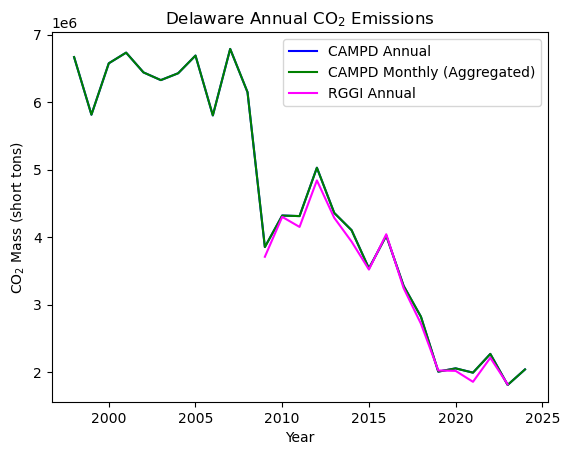

In [65]:
plt.plot(df_annual[(df_annual.State=="DE")&(df_annual.Year>1997)].Year, df_annual[(df_annual.State=="DE")&(df_annual.Year>1997)]["CO2 Mass (short tons)"], label="CAMPD Annual", color="blue")
plt.plot(df_monthly_annual[(df_monthly_annual.state=="DE")&(df_monthly_annual.year>1997)].year, df_monthly_annual[(df_monthly_annual.state=="DE")&(df_monthly_annual.year>1997)].total_co2, label="CAMPD Monthly (Aggregated)", color="green")
plt.plot(df_rggi_de.Year, df_rggi_de["SUM_CO2_MASS__SHORT_TONS__RGGI 9"], label="RGGI Annual", color="magenta")
plt.legend(loc="upper right")
plt.title("Delaware Annual CO$_2$ Emissions")
plt.xlabel("Year")
plt.ylabel("CO$_2$ Mass (short tons)")

We can see here that the data from all sources agree, but it is evident that the data from RGGI has some minor effect causing it to be slightly lesser across the board. For the purposes of this quick chick, however, it is clear that these sources are consistent with one another.